In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_ids = [
    "11IstrgPDn521ZZWSM9FXPra_WKCSTUnz",
    "1dJG4-Xl3aIRCBAva2HO1deWKKYvGWOJe",
    "14KDvjd6ixNHRnf_B9Df0A-DDroTTqI57",
    "1FLQ10Am7UgD7uUt3L2aesJzdP3L6FLfN",
    "1l6nnYWdkIceJUw5pH9umerfeVijmhccP",
    "1zdSauBF8wHt670Bdv6aRXc9KTKwIvDhq",
    "1ftMzt4iy0IFr5e-OnUd5VHL6WR8IL5um",
    "1K3RCKeJIglgiMRSK70N2F_I2Vy_rHYgS",
    "1_OXAPIj-6GLdvlnQjQF_op_uKne2WgUD",
    "1Lh5GYcHvXwungyWoHiXYZH0Cbkr18h9A",
    "1193I6J7pQw4gp3uoGQh4vP-hZw70Caik",
    "19_3txs87HRSLrTFFNjk542Bm40KAmn4q",
    "1yM0f_Xba95egCzlwZj9lbtbuJ6t0f1ws",
    "1fbgnT7bnSzlAWPhSVuL4xPSPgg7UkY8O",
    "1Tj0-Rw3MZJjRwNHg261qwKdLJdc4Db-p",
    "1InRZNBT5cANspViwz8RQpagbmLgpV9oJ",
    "1ZM-pxfEGYRik0brV_iDtDQTZdEWhLqPy",
    "1A11omS6Y3cNbsEC9XJeNf5QVJoXNpoiS",
    "1ZNVVYcAOMnHIpDpdzyimNmcTOIWp-3HC",
    "1dV6cSXB5VF4VerDQccxIQ8GelrkCOqie",
    "1X5E4588VM2MYSPfwpcfmxNXYPOhvaHbh",
    "1GUo_LlbRBgNUTyBrj5O72mDHPcJUXRTx",
    "1-bQMidQ3mvnGixFe4SJc0-NyRVcQjPNM",
    "1mf402QAnTbt5iz7XVjreMHgkFsYIlWHT",
    "1onap3HJkeE7n49sGEz67kohhZ-pu9Dkw",
    "177JHeRVITbDRE3u1W5wEC9CoehBNKb1_",
    "1lB4-Vl1zPyHfoN_ijjuCepIb-yk5yqkr",
    "1s3yHRV3k7JydHpOOX9E8sEQ5pgxtA_sE",
    "190hg_cE_EfLl55N9uABvc-Er6CqpaEk3",
    "1QfJyXPYJuNV9NPT2lHOhRMMx9RJIX9-A",
    "1YsTYPFZP1OL5YEo9pDa6HwQv5kw0alji",
    "1U2I7Sib1Ri2fFOj29nT3IbHFYhxMCxwV"
]

In [3]:
# Create combined DataFrame with unique id column
combined_df = pd.DataFrame()

for idx, file_id in enumerate(file_ids):
    url = f"https://drive.google.com/uc?id={file_id}"
    temp_df = pd.read_csv(url)
    temp_df['id'] = idx
    combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

combined_df.head()


,activity,time_s,lw_x,lw_y,lw_z,lh_x,lh_y,lh_z,la_x,la_y,la_z,ra_x,ra_y,ra_z,id
0,99,0.01,0.012,1.031,-0.008,0.039,1.027,0.004,-0.039,1.016,0.086,0.328,1.543,0.672,0
1,99,0.02,-0.219,-0.023,1.445,-0.289,-0.051,1.063,-0.395,-0.191,0.953,-0.285,0.480,1.410,0
2,99,0.03,0.297,-0.160,1.738,-0.086,-0.609,1.547,-0.180,-0.746,1.230,-0.262,0.734,1.426,0
3,99,0.04,0.645,-0.113,0.980,0.129,-0.730,0.883,0.043,-0.859,0.523,-0.137,0.941,0.617,0
4,99,0.05,0.781,-0.113,0.645,0.215,-0.801,0.578,0.137,-0.930,0.207,-0.078,0.992,0.277,0


In [4]:
#Preprocessing data
#dropped any rows that don't have activity = 1, 2, or 3
#TODO: drop rows with missing values
combined_df.dropna(inplace=True)

#Features: lw_x, lw_y, lw_z
#TODO -- Target: person id (need to create column for this)

#TODO -- Do we need to group by instance?

df_filtered = combined_df[combined_df['activity'].isin([1, 2, 3])]
df_filtered = df_filtered[['id', 'activity', 'time_s', 'lw_x', 'lw_y', 'lw_z']]

df_filtered.head()

# # Features and target variable
X = df_filtered[['activity', 'time_s', 'lw_x', 'lw_y', 'lw_z']]
y = df_filtered['id']

# # Encode columns (if needed)
# X.loc[:, 'Sex'] = X['Sex'].map({'female': 0, 'male': 1})

In [5]:
#Copied from geeksforgeeks random forest implementation:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [6]:
#Copied from geeksforgeeks random forest implementation:
# Make predictions
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate detailed classification report
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.70

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     13566
           1       0.54      0.49      0.51     10292
           2       0.77      0.73      0.75     15569
           3       0.69      0.74      0.71     12451
           4       0.69      0.65      0.67     13351
           5       0.63      0.72      0.67     14450
           6       0.63      0.55      0.59     12076
           7       0.56      0.51      0.53     11245
           8       0.67      0.79      0.73     13900
           9       0.69      0.60      0.64     12050
          10       0.62      0.63      0.62     11953
          11       0.66      0.66      0.66     13317
          12       0.61      0.59      0.60     12942
          13       0.66      0.65      0.66     14082
          14       0.84      0.87      0.85     14256
          15       0.66      0.61      0.63     11698
          16       0.69      0.61      0.

In [7]:
"""Random Forest"""
# Select a single test sample
sample = X_test.iloc[0:1]
predicted_class = rf_classifier.predict(sample)[0]
predicted_probabilities = rf_classifier.predict_proba(sample)

confidence_level = max(predicted_probabilities[0])

sample_dict = sample.iloc[0].to_dict()
print(f"\nSample Walker: {sample_dict}")
print(f"Predicted Walker ID: {predicted_class}")  # The ID predicted by the model
print(f"Actual Walker ID: {y_test.iloc[0]}")
print(f"Confidence Level: {confidence_level:.2f}")  # Confidence level of the prediction


Sample Walker: {'activity': 1.0, 'time_s': 935.82, 'lw_x': -0.563, 'lw_y': -1.313, 'lw_z': 0.059}
Predicted Walker ID: 3
Actual Walker ID: 2
Confidence Level: 0.31


In [8]:
"""Logistic Regression"""
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Select a single test sample (same as for Random Forest)
sample = X_test.iloc[0:1]
predicted_class = log_reg.predict(sample)[0]
predicted_probabilities = log_reg.predict_proba(sample)

confidence_level = max(predicted_probabilities[0])

sample_dict = sample.iloc[0].to_dict()
print(f"\nSample Walker: {sample_dict}")
print(f"Predicted Walker ID (Logistic Regression): {predicted_class}")
print(f"Actual Walker ID: {y_test.iloc[0]}")
print(f"Confidence Level: {confidence_level:.2f}")


Sample Walker: {'activity': 1.0, 'time_s': 935.82, 'lw_x': -0.563, 'lw_y': -1.313, 'lw_z': 0.059}
Predicted Walker ID (Logistic Regression): 18
Actual Walker ID: 2
Confidence Level: 0.13


In [9]:
# """"Support Vector Machine"""
# from sklearn.svm import SVC

# # Initialize the model
# svm = SVC(kernel='rbf')

# # Train the model
# svm.fit(X_train, y_train)

# svm = SVC(kernel='rbf', probability=True)
# svm.fit(X_train, y_train)

# # Select a single test sample
# sample = X_test.iloc[0:1]
# predicted_class = svm.predict(sample)[0]
# predicted_probabilities = svm.predict_proba(sample)

# confidence_level = max(predicted_probabilities[0])

# print(f"\nSample Walker: {sample_dict}")
# print(f"Predicted Walker ID (SVM): {predicted_class}")
# print(f"Actual Walker ID: {y_test.iloc[0]}")
# print(f"Confidence Level: {confidence_level:.2f}")

In [10]:
# """Gradient Boosting"""
# from sklearn.ensemble import GradientBoostingClassifier

# # Initialize the model
# gbc = GradientBoostingClassifier()

# # Train the model
# gbc.fit(X_train, y_train)

# sample = X_test.iloc[0:1]
# predicted_class = gbc.predict(sample)[0]
# predicted_probabilities = gbc.predict_proba(sample)

# confidence_level = max(predicted_probabilities[0])

# print(f"\nSample Walker: {sample_dict}")
# print(f"Predicted Walker ID (Gradient Boosting): {predicted_class}")
# print(f"Actual Walker ID: {y_test.iloc[0]}")
# print(f"Confidence Level: {confidence_level:.2f}")

In [11]:
"""KNN"""
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

sample = X_test.iloc[0:1]
predicted_class = knn.predict(sample)[0]
predicted_probabilities = knn.predict_proba(sample)

confidence_level = max(predicted_probabilities[0])

print(f"\nSample Walker: {sample_dict}")
print(f"Predicted Walker ID (KNN): {predicted_class}")
print(f"Actual Walker ID: {y_test.iloc[0]}")
print(f"Confidence Level: {confidence_level:.2f}")


Sample Walker: {'activity': 1.0, 'time_s': 935.82, 'lw_x': -0.563, 'lw_y': -1.313, 'lw_z': 0.059}
Predicted Walker ID (KNN): 3
Actual Walker ID: 2
Confidence Level: 0.60


In [12]:
"""Compare All Models"""
# Dictionary to store models
models = {
    'Random Forest': rf_classifier,
    'Logistic Regression': log_reg,
    # 'SVM': svm,
    # 'Gradient Boosting': gbc,
    'KNN': knn
}

# Select a single test sample
sample = X_test.iloc[0:1]
sample_dict = sample.iloc[0].to_dict()
actual_walker = y_test.iloc[0]

print(f"\nSample Walker: {sample_dict}")
print(f"Actual Walker ID: {actual_walker}")
print("\nPredictions:")

for name, model in models.items():
    predicted_class = model.predict(sample)[0]
    predicted_probabilities = model.predict_proba(sample)
    confidence_level = max(predicted_probabilities[0])
    
    print(f"{name}: Walker ID {predicted_class} (Confidence: {confidence_level:.2f})")


Sample Walker: {'activity': 1.0, 'time_s': 935.82, 'lw_x': -0.563, 'lw_y': -1.313, 'lw_z': 0.059}
Actual Walker ID: 2

Predictions:
Random Forest: Walker ID 3 (Confidence: 0.31)
Logistic Regression: Walker ID 18 (Confidence: 0.13)
KNN: Walker ID 3 (Confidence: 0.60)


In [13]:
"""Authentication Using Existing Trained Models"""
import os
import glob
import pandas as pd
from collections import Counter

# Set ID's for authentication
JAMIE_ID = 32
ANDREW_ID = 33
CONFIDENCE_THRESHOLD = 0.60

# Load Jamie's and Andrew's data (for testing and reference)
def load_user_data(data_dir, file_pattern="*.csv"):
    """Load all CSV files and transform to model format"""
    all_data = []
    csv_files = glob.glob(os.path.join(data_dir, file_pattern))
    print(f"Found {len(csv_files)} files in {data_dir}")
    
    for file_path in csv_files:
        file_name = os.path.basename(file_path)
        try:
            # Load the CSV file
            df = pd.read_csv(file_path)
            
            # Transform based on the format
            if 'accelerationX' in df.columns:
                transformed_df = pd.DataFrame({
                    'activity': 1,
                    'time_s': df['seconds_elapsed'],
                    'lw_x': df['accelerationX'],
                    'lw_y': df['accelerationY'],
                    'lw_z': df['accelerationZ']
                })
            elif 'x' in df.columns:
                transformed_df = pd.DataFrame({
                    'activity': 1, 
                    'time_s': df['seconds_elapsed'],
                    'lw_x': df['x'],
                    'lw_y': df['y'],
                    'lw_z': df['z']
                })
            else:
                print(f"Skipping {file_name} - unknown format")
                continue
                
            all_data.append({
                'name': file_name,
                'data': transformed_df
            })
            print(f"Processed {file_name}: {len(transformed_df)} records")
            
        except Exception as e:
            print(f"Error processing {file_name}: {e}")
    
    return all_data

# Define authentication function using existing models
def authenticate_walking_data(walking_data, expected_user_name, threshold=CONFIDENCE_THRESHOLD):
    # Use existing trained models
    models = {
        'Random Forest': rf_classifier,
        'Logistic Regression': log_reg,
        'KNN': knn
    }
    
    results = {}
    
    for name, model in models.items():
        predictions = model.predict(walking_data)
        probabilities = model.predict_proba(walking_data)
        
        prediction_counts = Counter(predictions)
        most_common_id = prediction_counts.most_common(1)[0][0]
        match_percentage = prediction_counts[most_common_id] / len(predictions) * 100
        
        confidence_scores = []
        for i, pred in enumerate(predictions):
            if pred == most_common_id:
                confidence_scores.append(max(probabilities[i]))
                
        avg_confidence = sum(confidence_scores) / len(confidence_scores) if confidence_scores else 0
        
        is_authenticated = avg_confidence >= threshold
        
        results[name] = {
            'most_likely_walker_id': most_common_id,
            'confidence': avg_confidence,
            'match_percentage': match_percentage,
            'authentication_passed': is_authenticated,
            'top_predictions': prediction_counts.most_common(3)
        }
    
    return results

def test_walking_authentication(file_path, expected_user_name):
    """Test if a file contains walking data from the expected user"""
    print(f"\nAnalyzing walking data from: {os.path.basename(file_path)}")
    print(f"Expected user: {expected_user_name}")
    
    try:
        # Load and transform the data
        test_df = pd.read_csv(file_path)
        
        # Transform data based on format
        if 'accelerationX' in test_df.columns:
            processed_df = pd.DataFrame({
                'activity': 1,
                'time_s': test_df['seconds_elapsed'],
                'lw_x': test_df['accelerationX'],
                'lw_y': test_df['accelerationY'], 
                'lw_z': test_df['accelerationZ']
            })
        elif 'x' in test_df.columns:
            processed_df = pd.DataFrame({
                'activity': 1,
                'time_s': test_df['seconds_elapsed'],
                'lw_x': test_df['x'],
                'lw_y': test_df['y'], 
                'lw_z': test_df['z']
            })
        else:
            print("Unknown file format.")
            return
            
        # Authenticate
        auth_results = authenticate_walking_data(processed_df, expected_user_name, CONFIDENCE_THRESHOLD)
        
        # Print results
        print(f"\nWalking Pattern Analysis Results:")
        print(f"Confidence Threshold: {CONFIDENCE_THRESHOLD:.2f}")
        
        for model_name, result in auth_results.items():
            auth_status = "✓ HIGH CONFIDENCE" if result['authentication_passed'] else "✗ LOW CONFIDENCE"
            print(f"\n{model_name}: {auth_status}")
            print(f"  Most likely walker ID: {result['most_likely_walker_id']}")
            print(f"  Confidence level: {result['confidence']:.2f}")
            print(f"  Match percentage: {result['match_percentage']:.1f}%")
            print(f"  Top 3 matches: {result['top_predictions']}")
            
    except Exception as e:
        print(f"Error analyzing walking data: {e}")

In [14]:
# Test Jamie's walking data
jamie_files = glob.glob(os.path.join("data/jamie", "*.csv"))
if jamie_files:
    # Test the first file
    test_walking_authentication(jamie_files[0], "Jamie")
    
    if len(jamie_files) > 1:
        test_walking_authentication(jamie_files[1], "Jamie")


Analyzing walking data from: walk-around-phone-2.csv
Expected user: Jamie

Walking Pattern Analysis Results:
Confidence Threshold: 0.60

Random Forest: ✗ LOW CONFIDENCE
  Most likely walker ID: 20
  Confidence level: 0.60
  Match percentage: 26.2%
  Top 3 matches: [(np.int64(20), 15126), (np.int64(22), 4524), (np.int64(21), 4075)]

Logistic Regression: ✓ HIGH CONFIDENCE
  Most likely walker ID: 0
  Confidence level: 0.77
  Match percentage: 28.1%
  Top 3 matches: [(np.int64(0), 16270), (np.int64(23), 12203), (np.int64(20), 11882)]

KNN: ✓ HIGH CONFIDENCE
  Most likely walker ID: 20
  Confidence level: 0.96
  Match percentage: 24.3%
  Top 3 matches: [(np.int64(20), 14034), (np.int64(11), 7737), (np.int64(23), 4295)]

Analyzing walking data from: walk-around-phone-3.csv
Expected user: Jamie

Walking Pattern Analysis Results:
Confidence Threshold: 0.60

Random Forest: ✓ HIGH CONFIDENCE
  Most likely walker ID: 20
  Confidence level: 0.66
  Match percentage: 32.7%
  Top 3 matches: [(np.in

In [15]:
# Test Andrew's walking data
andrew_files = glob.glob(os.path.join("data/andrew", "Accelerometer-*.csv"))
if andrew_files:
    test_walking_authentication(andrew_files[0], "Andrew")


Analyzing walking data from: Accelerometer-2.csv
Expected user: Andrew

Walking Pattern Analysis Results:
Confidence Threshold: 0.60

Random Forest: ✓ HIGH CONFIDENCE
  Most likely walker ID: 20
  Confidence level: 0.62
  Match percentage: 34.9%
  Top 3 matches: [(np.int64(20), 1272), (np.int64(25), 1068), (np.int64(22), 533)]

Logistic Regression: ✓ HIGH CONFIDENCE
  Most likely walker ID: 0
  Confidence level: 0.97
  Match percentage: 33.3%
  Top 3 matches: [(np.int64(0), 1212), (np.int64(20), 1152), (np.int64(23), 892)]

KNN: ✓ HIGH CONFIDENCE
  Most likely walker ID: 11
  Confidence level: 0.99
  Match percentage: 80.1%
  Top 3 matches: [(np.int64(11), 2919), (np.int64(25), 724), (np.int64(22), 1)]


In [16]:
"""Visualization Function for Existing Authentication Results"""
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def visualize_walking_authentication():
    """Create presentation-quality visualizations using already tested data"""
    sns.set_theme(style="whitegrid")
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    fig.suptitle("Walking Pattern Authentication Analysis", fontsize=24, y=0.98)
    
    results_data = []
    
    for user_name, files in [("Jamie", jamie_files), ("Andrew", andrew_files)]:
        for file_path in files[:2]:
            file_name = os.path.basename(file_path)
            
            try:
                test_df = pd.read_csv(file_path)
                
                if 'accelerationX' in test_df.columns:
                    processed_df = pd.DataFrame({
                        'activity': 1,
                        'time_s': test_df['seconds_elapsed'],
                        'lw_x': test_df['accelerationX'],
                        'lw_y': test_df['accelerationY'], 
                        'lw_z': test_df['accelerationZ']
                    })
                elif 'x' in test_df.columns:
                    processed_df = pd.DataFrame({
                        'activity': 1,
                        'time_s': test_df['seconds_elapsed'],
                        'lw_x': test_df['x'],
                        'lw_y': test_df['y'], 
                        'lw_z': test_df['z']
                    })
                else:
                    continue
                    
                auth_results = authenticate_walking_data(processed_df, user_name)
                
                for model_name, result in auth_results.items():
                    results_data.append({
                        'file': file_name,
                        'user': user_name,
                        'model': model_name,
                        'predicted_id': result['most_likely_walker_id'],
                        'confidence': result['confidence'],
                        'match_percentage': result['match_percentage'],
                        'authenticated': result['authentication_passed']
                    })
                
                if 'x' in test_df.columns:
                    sample_data = test_df[['x', 'y', 'z']].iloc[:500].copy()
                    sample_data['user'] = user_name
                    sample_data['file'] = file_name
                elif 'accelerationX' in test_df.columns:
                    sample_data = test_df[['accelerationX', 'accelerationY', 'accelerationZ']].iloc[:500].copy()
                    sample_data.columns = ['x', 'y', 'z']
                    sample_data['user'] = user_name
                    sample_data['file'] = file_name
                
                if 'sample_walking_data' not in globals():
                    sample_walking_data = sample_data
                else:
                    sample_walking_data = pd.concat([sample_walking_data, sample_data])
                    
            except Exception as e:
                print(f"Error processing {file_name}: {e}")
    
    results_df = pd.DataFrame(results_data)
    
    if results_df.empty:
        print("No data available for visualization")
        return
    
    # PLOT 1: Confidence by model and user (top left)
    sns.barplot(
        data=results_df, 
        x='model', 
        y='confidence', 
        hue='user',
        ax=axes[0,0],
        palette='viridis'
    )
    axes[0,0].set_title('Authentication Confidence by Model', fontsize=16)
    axes[0,0].axhline(y=CONFIDENCE_THRESHOLD, color='red', linestyle='--', 
                    label=f'Threshold ({CONFIDENCE_THRESHOLD})')
    axes[0,0].legend(title='User')
    axes[0,0].set_ylim(0, 1.0)
    
    # PLOT 2: Predicted walker IDs (top right)
    id_counts = results_df.groupby(['user', 'predicted_id']).size().reset_index(name='count')
    sns.barplot(
        data=id_counts, 
        x='predicted_id', 
        y='count', 
        hue='user',
        ax=axes[0,1],
        palette='mako'
    )
    axes[0,1].set_title('Most Common Predicted Walker IDs', fontsize=16)
    axes[0,1].set_xlabel('Walker ID')
    axes[0,1].set_ylabel('Count')
    
    # PLOT 3: Walking pattern visualization (bottom left)
    if 'sample_walking_data' in globals() and not sample_walking_data.empty:
        for user in sample_walking_data['user'].unique():
            user_data = sample_walking_data[sample_walking_data['user'] == user]
            axes[1,0].plot(
                user_data['x'].reset_index(drop=True),
                label=f"{user}'s Walking Pattern",
                alpha=0.8,
                linewidth=1.5
            )
    
    axes[1,0].set_title('X-Acceleration Walking Patterns', fontsize=16)
    axes[1,0].set_xlabel('Sample Points')
    axes[1,0].set_ylabel('X-Acceleration')
    axes[1,0].legend()
    
    # PLOT 4: Authentication success rate (bottom right)
    results_df['passed'] = results_df['confidence'] >= CONFIDENCE_THRESHOLD
    auth_summary = results_df.groupby(['user', 'model'])['passed'].mean().reset_index()
    auth_summary['pass_rate'] = auth_summary['passed'] * 100
    
    sns.barplot(
        data=auth_summary, 
        x='model', 
        y='pass_rate', 
        hue='user',
        ax=axes[1,1],
        palette='viridis'
    )
    axes[1,1].set_title('Authentication Success Rate', fontsize=16)
    axes[1,1].set_xlabel('Model')
    axes[1,1].set_ylabel('Success Rate (%)')
    axes[1,1].set_ylim(0, 100)
    
    # Final adjustments
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('walking_authentication_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return results_df

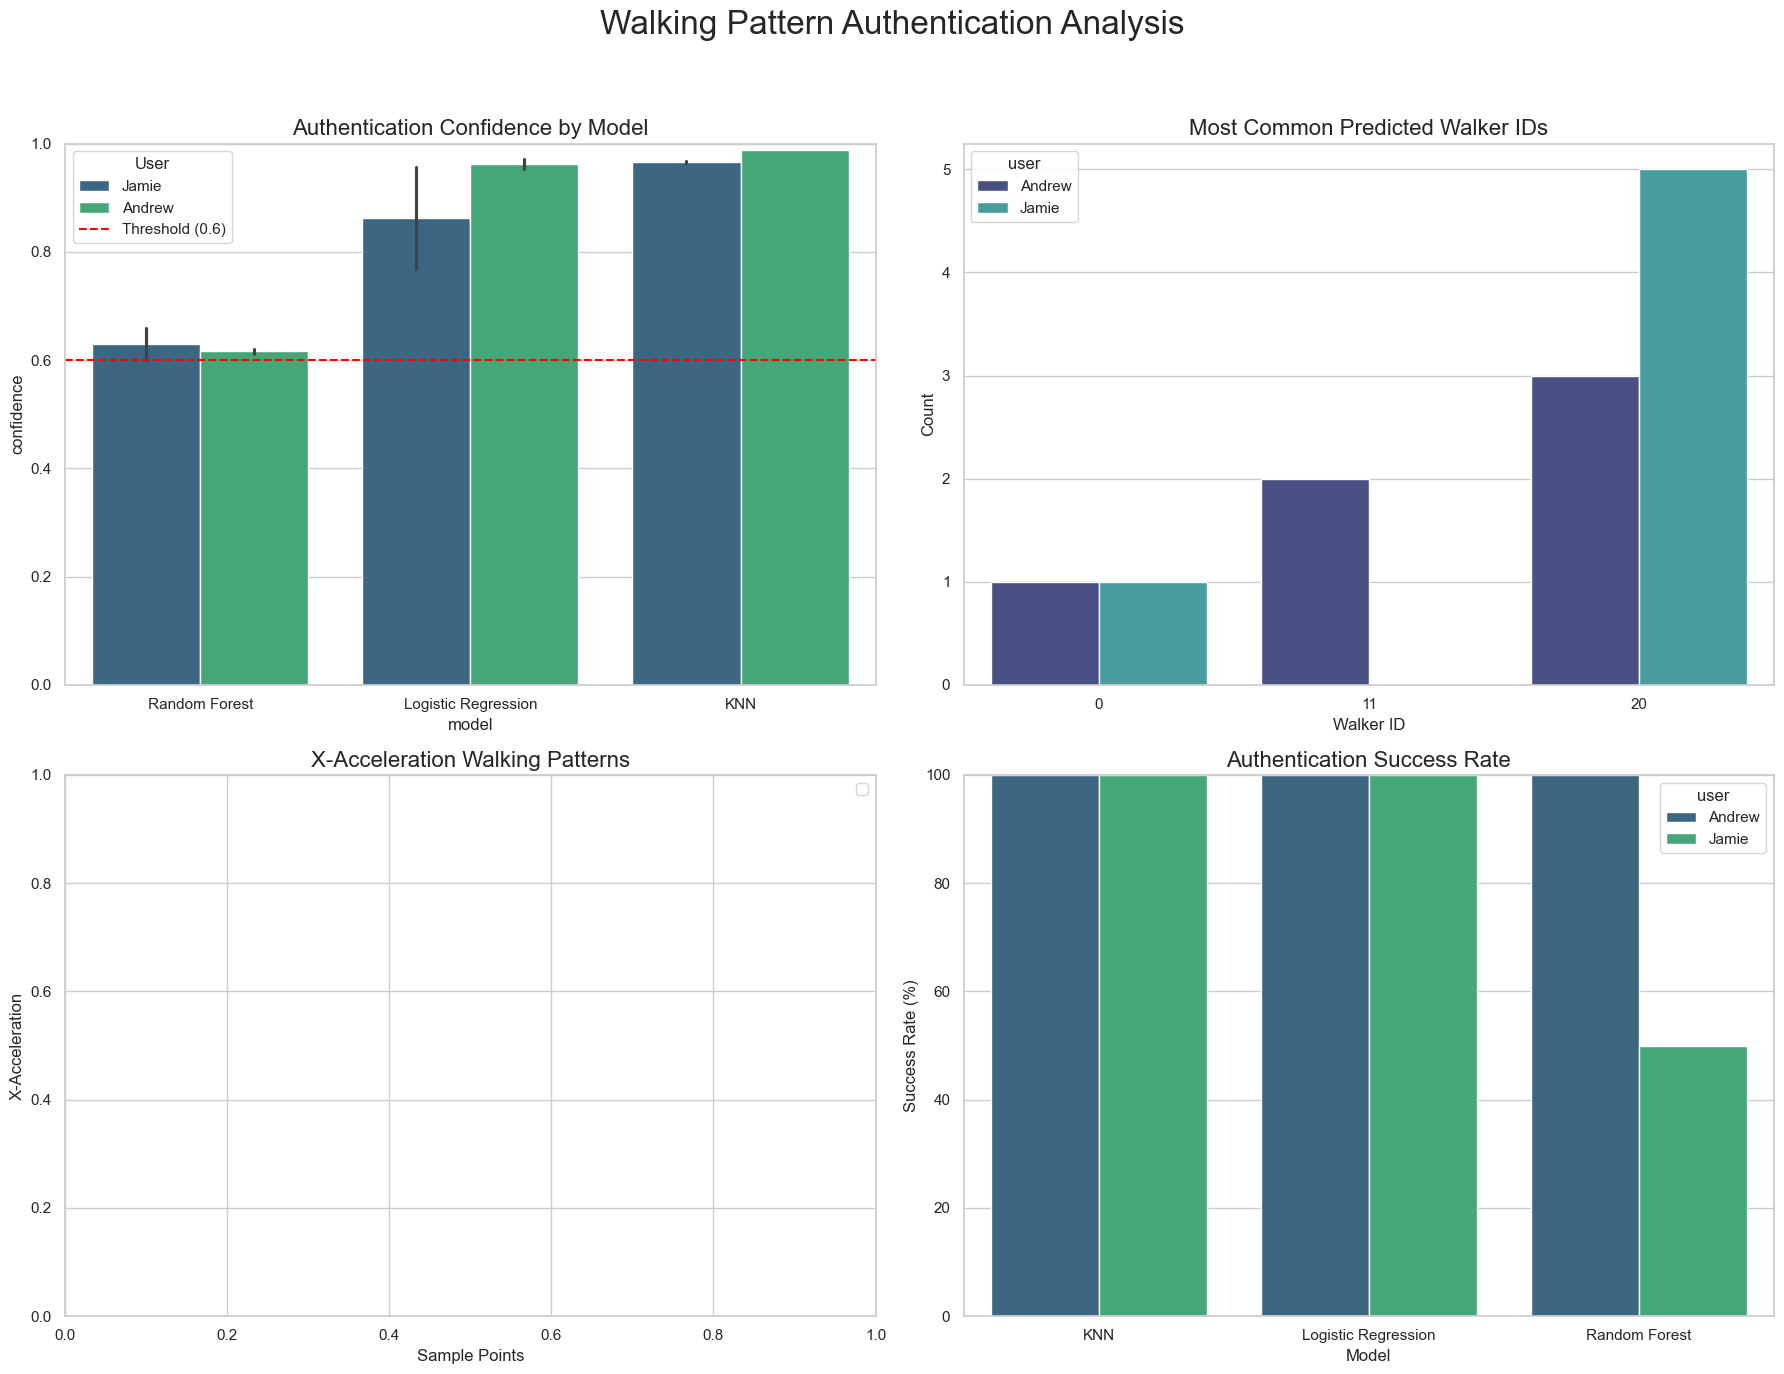

In [17]:
results_df = visualize_walking_authentication()